In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import pandas as pd

#plt.style.use('fivethirtyeight')
#sns.set_context("notebook")
from scipy import optimize
import scipy.stats as stats

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Installing Plotly:
#!pip install plotly
# Jupyter Lab Extensions required for jupyter:
#!jupyter labextension install jupyterlab-plotly
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go

sns.set_theme(style='darkgrid', font_scale = 1.3,
              rc={'figure.figsize':(7,5)},color_codes='#919CA4, #454E68, #EEA370, #B8B2CA, #CB969D')

# 数据处理

In [4]:
bilibili = pd.read_csv("bilibli_data.csv")

In [5]:
bilibili

mid  follower sex  video  master  album  article  channel  \
0            75    374100   男    486       3    615       12        6   
1            79    181437   女    941       3      0        0        0   
2            97     14663   男    451       1      0        0        0   
3           159    111106   男    315       0    580        0        7   
4           197      3672  保密   2107       3    397        9        2   
...         ...       ...  ..    ...     ...    ...      ...      ...   
8355  453589737    103000   男    258       0      2        5        0   
8356  454737600     26020  保密     59       0    102        0        0   
8357  454819874     14088  保密    105       0      0        0        1   
8358  458154143     35402  保密     58       0      3        0        2   
8359  470259211        48  保密     54       0     14       12        0   

      time_ave20    play_ave20  weibo  wx  qq  taobao  mail  tiktok  redbook  \
0        9983.50  80015.850000      0   0   1       0     0       0        0   
1        1195.75  27027.100000      1   0   0       0     0       0        0   
2         585.00  12460.733333      0   0   0       0     0       0        0   
3        1342.25  12985.950000      0   0   0       0     0       0        0   
4       13596.00    148.000000      0   0   0       0     1       0        0   
...          ...           ...    ...  ..  ..     ...   ...     ...      ...   
8355      158.70   3532.000000      0   0   0       0     0       0        0   
8356      830.75   2062.000000      0   0   0       0     0       0        0   
8357     3417.60   4780.700000      0   0   0       0     0       0        0   
8358      693.85  12236.450000      0   0   0       0     0       0        0   
8359      417.65     15.700000      0   0   0       0     0       0        0   

                                  self_tags video_tag_combine  video_max_ratio  
0        ['拖稿大师', '上古老坟', '丸子', '话唠', '绅士']                游戏         0.864198  
1                                        []                游戏         0.645058  
2                                        []                动画         0.494457  
3     ['猫和老鼠', '真人快打', 'MMD', '兔八哥', '高飞狗']                动画         0.409524  
4                      ['虚拟主播', '搬运', '翻译']                音乐         0.817750  
...                                     ...               ...              ...  
8355                                     []                生活         0.926357  
8356                                     []                动画         0.677966  
8357                                     []                娱乐         1.000000  
8358                                     []                动画         0.568966  
8359                                     []                动画         0.907407  

[8360 rows x 20 columns]

In [6]:
corr_follower = bilibili.corr()['follower']
corr_follower

mid               -0.041834
follower           1.000000
video              0.066581
master             0.105413
album              0.006819
article            0.007061
channel            0.049929
time_ave20        -0.035884
play_ave20         0.785638
weibo              0.167802
wx                 0.129093
qq                 0.051706
taobao             0.052689
mail               0.137164
tiktok             0.019058
redbook            0.013210
video_max_ratio    0.029028
Name: follower, dtype: float64

将sex数据变成0/1数据

In [7]:
bilibili['sex']

0        男
1        女
2        男
3        男
4       保密
        ..
8355     男
8356    保密
8357    保密
8358    保密
8359    保密
Name: sex, Length: 8360, dtype: object

In [8]:
sex01 = []
for x in bilibili['sex']:
    if x == '男' : sex01.append(0)
    elif x == '女' : sex01.append(1)
    else : sex01.append(0.5)
bilibili['sex01'] = sex01
bilibili['sex01']

0       0.0
1       1.0
2       0.0
3       0.0
4       0.5
       ... 
8355    0.0
8356    0.5
8357    0.5
8358    0.5
8359    0.5
Name: sex01, Length: 8360, dtype: float64

将self_tags数据变成0/1数据

In [9]:
bilibili['self_tags']

0          ['拖稿大师', '上古老坟', '丸子', '话唠', '绅士']
1                                          []
2                                          []
3       ['猫和老鼠', '真人快打', 'MMD', '兔八哥', '高飞狗']
4                        ['虚拟主播', '搬运', '翻译']
                        ...                  
8355                                       []
8356                                       []
8357                                       []
8358                                       []
8359                                       []
Name: self_tags, Length: 8360, dtype: object

In [10]:
self_tags01 = []
for x in bilibili['self_tags']:
    if x == '[]' : self_tags01.append(0)
    else : self_tags01.append(1)
bilibili['self_tags01'] = self_tags01
bilibili['self_tags01']

0       1
1       0
2       0
3       1
4       1
       ..
8355    0
8356    0
8357    0
8358    0
8359    0
Name: self_tags01, Length: 8360, dtype: int64

In [11]:
bilibili

mid  follower sex  video  master  album  article  channel  \
0            75    374100   男    486       3    615       12        6   
1            79    181437   女    941       3      0        0        0   
2            97     14663   男    451       1      0        0        0   
3           159    111106   男    315       0    580        0        7   
4           197      3672  保密   2107       3    397        9        2   
...         ...       ...  ..    ...     ...    ...      ...      ...   
8355  453589737    103000   男    258       0      2        5        0   
8356  454737600     26020  保密     59       0    102        0        0   
8357  454819874     14088  保密    105       0      0        0        1   
8358  458154143     35402  保密     58       0      3        0        2   
8359  470259211        48  保密     54       0     14       12        0   

      time_ave20    play_ave20  ...  qq  taobao  mail  tiktok  redbook  \
0        9983.50  80015.850000  ...   1       0     0       0        0   
1        1195.75  27027.100000  ...   0       0     0       0        0   
2         585.00  12460.733333  ...   0       0     0       0        0   
3        1342.25  12985.950000  ...   0       0     0       0        0   
4       13596.00    148.000000  ...   0       0     1       0        0   
...          ...           ...  ...  ..     ...   ...     ...      ...   
8355      158.70   3532.000000  ...   0       0     0       0        0   
8356      830.75   2062.000000  ...   0       0     0       0        0   
8357     3417.60   4780.700000  ...   0       0     0       0        0   
8358      693.85  12236.450000  ...   0       0     0       0        0   
8359      417.65     15.700000  ...   0       0     0       0        0   

                                  self_tags  video_tag_combine  \
0        ['拖稿大师', '上古老坟', '丸子', '话唠', '绅士']                 游戏   
1                                        []                 游戏   
2                                        []                 动画   
3     ['猫和老鼠', '真人快打', 'MMD', '兔八哥', '高飞狗']                 动画   
4                      ['虚拟主播', '搬运', '翻译']                 音乐   
...                                     ...                ...   
8355                                     []                 生活   
8356                                     []                 动画   
8357                                     []                 娱乐   
8358                                     []                 动画   
8359                                     []                 动画   

     video_max_ratio sex01  self_tags01  
0           0.864198   0.0            1  
1           0.645058   1.0            0  
2           0.494457   0.0            0  
3           0.409524   0.0            1  
4           0.817750   0.5            1  
...              ...   ...          ...  
8355        0.926357   0.0            0  
8356        0.677966   0.5            0  
8357        1.000000   0.5            0  
8358        0.568966   0.5            0  
8359        0.907407   0.5            0  

[8360 rows x 22 columns]

# 相关性

In [12]:
bilibili.corr()

mid  follower     video    master     album   article  \
mid              1.000000 -0.041834 -0.050818 -0.102634 -0.071364  0.004977   
follower        -0.041834  1.000000  0.066581  0.105413  0.006819  0.007061   
video           -0.050818  0.066581  1.000000 -0.005962  0.123503  0.046169   
master          -0.102634  0.105413 -0.005962  1.000000  0.094419  0.039828   
album           -0.071364  0.006819  0.123503  0.094419  1.000000  0.196616   
article          0.004977  0.007061  0.046169  0.039828  0.196616  1.000000   
channel         -0.070665  0.049929  0.084099  0.321064  0.115833  0.071365   
time_ave20      -0.023183 -0.035884  0.027373 -0.023254 -0.021317  0.009043   
play_ave20      -0.031076  0.785638 -0.040428  0.078409 -0.021166 -0.013887   
weibo           -0.091081  0.167802 -0.020584  0.221738  0.032017  0.019314   
wx               0.029736  0.129093  0.012499  0.134232  0.002792  0.098415   
qq              -0.063582  0.051706  0.017886  0.202017  0.135225  0.017996   
taobao          -0.017321  0.052689  0.001479  0.052099  0.022144  0.010377   
mail            -0.002097  0.137164  0.015270  0.085241  0.011385  0.009191   
tiktok           0.025157  0.019058 -0.005377  0.033470 -0.005089  0.019017   
redbook          0.043585  0.013210 -0.013792  0.014434 -0.010923  0.002589   
video_max_ratio  0.068718  0.029028  0.028506 -0.019546 -0.068703 -0.013790   
sex01            0.059234 -0.019234 -0.018531 -0.024834 -0.007748 -0.007856   
self_tags01     -0.178485  0.070452  0.032448  0.225477  0.064791  0.011952   

                  channel  time_ave20  play_ave20     weibo        wx  \
mid             -0.070665   -0.023183   -0.031076 -0.091081  0.029736   
follower         0.049929   -0.035884    0.785638  0.167802  0.129093   
video            0.084099    0.027373   -0.040428 -0.020584  0.012499   
master           0.321064   -0.023254    0.078409  0.221738  0.134232   
album            0.115833   -0.021317   -0.021166  0.032017  0.002792   
article          0.071365    0.009043   -0.013887  0.019314  0.098415   
channel          1.000000    0.044981   -0.005181  0.159519  0.120346   
time_ave20       0.044981    1.000000   -0.040997 -0.010469 -0.040989   
play_ave20      -0.005181   -0.040997    1.000000  0.118658  0.060820   
weibo            0.159519   -0.010469    0.118658  1.000000  0.298513   
wx               0.120346   -0.040989    0.060820  0.298513  1.000000   
qq               0.184354    0.014034    0.044586  0.278034  0.103292   
taobao           0.062296   -0.002574    0.011333  0.113206  0.194897   
mail             0.078204   -0.010290    0.066975  0.246289  0.136022   
tiktok           0.029040   -0.017183    0.015043  0.113681  0.104176   
redbook          0.007638   -0.008817    0.002695  0.097481  0.045916   
video_max_ratio -0.052402    0.033165    0.010627  0.003688  0.010958   
sex01           -0.028845   -0.021784   -0.029075  0.022406 -0.002165   
self_tags01      0.219197   -0.000943    0.042214  0.202793  0.089115   

                       qq    taobao      mail    tiktok   redbook  \
mid             -0.063582 -0.017321 -0.002097  0.025157  0.043585   
follower         0.051706  0.052689  0.137164  0.019058  0.013210   
video            0.017886  0.001479  0.015270 -0.005377 -0.013792   
master           0.202017  0.052099  0.085241  0.033470  0.014434   
album            0.135225  0.022144  0.011385 -0.005089 -0.010923   
article          0.017996  0.010377  0.009191  0.019017  0.002589   
channel          0.184354  0.062296  0.078204  0.029040  0.007638   
time_ave20       0.014034 -0.002574 -0.010290 -0.017183 -0.008817   
play_ave20       0.044586  0.011333  0.066975  0.015043  0.002695   
weibo            0.278034  0.113206  0.246289  0.113681  0.097481   
wx               0.103292  0.194897  0.136022  0.104176  0.045916   
qq               1.000000  0.050106  0.172691  0.040351 -0.009986   
taobao           0.050106  1.000000  0.074293  0.067155  0.011208   
mail          

In [13]:
corr = bilibili.corr()

In [14]:
# #
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
# img = ax.imshow(corr, cmap="YlGnBu")
# fig.colorbar(img)

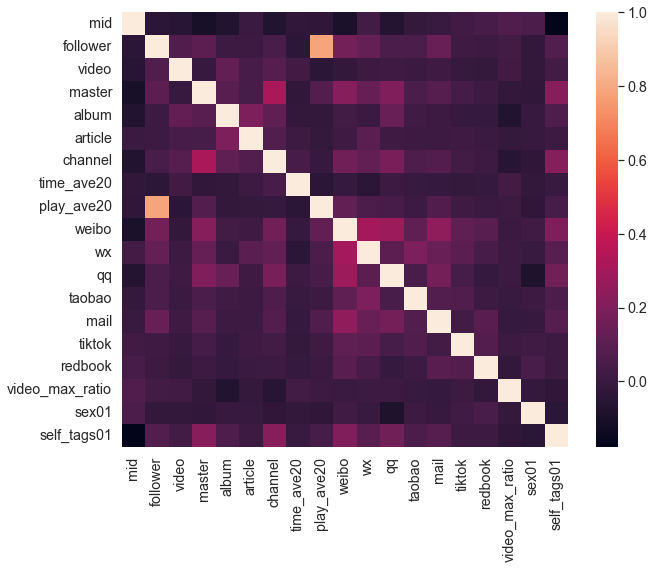

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
p1 = sns.heatmap(corr)

观察发现follower和近20个视频的平均播放量相关系数极大，以及频道数与代表作个数相关性较大，微博微信QQ三者相关性较大

与粉丝数相关的（相关系数绝对值大于0.1）：代表作个数，近期平均播放量，微博，微信，邮箱

mid大小与是否有self_tag呈负相关

是否有self_tag与channel数，微博微信呈正相关

In [16]:
bilibili['video_tag_combine'].unique()

array(['游戏', '动画', '音乐', '舞蹈', '鬼畜', '生活', '其他', '科技', '影视', '娱乐', '时尚'],
      dtype=object)

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Hist of (log)follower')

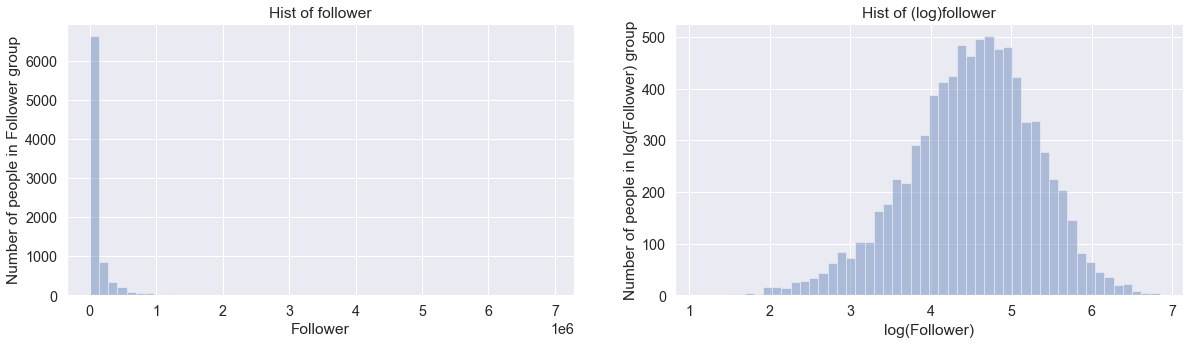

In [17]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Left subplot: Original income data
plt.sca(ax[0])
sns.distplot( a=bilibili['follower'], hist=True, kde=False, rug=False )
plt.xlabel('Follower')
plt.ylabel('Number of people in Follower group')
plt.title('Hist of follower')

# Right subplot: log transformed income data
plt.sca(ax[1])
sns.distplot( a=np.log10(bilibili['follower']), hist=True, kde=False, rug=False )
plt.xlabel('log(Follower)')
plt.ylabel('Number of people in log(Follower) group')
plt.title('Hist of (log)follower')

In [18]:
bilibili

mid  follower sex  video  master  album  article  channel  \
0            75    374100   男    486       3    615       12        6   
1            79    181437   女    941       3      0        0        0   
2            97     14663   男    451       1      0        0        0   
3           159    111106   男    315       0    580        0        7   
4           197      3672  保密   2107       3    397        9        2   
...         ...       ...  ..    ...     ...    ...      ...      ...   
8355  453589737    103000   男    258       0      2        5        0   
8356  454737600     26020  保密     59       0    102        0        0   
8357  454819874     14088  保密    105       0      0        0        1   
8358  458154143     35402  保密     58       0      3        0        2   
8359  470259211        48  保密     54       0     14       12        0   

      time_ave20    play_ave20  ...  qq  taobao  mail  tiktok  redbook  \
0        9983.50  80015.850000  ...   1       0     0       0        0   
1        1195.75  27027.100000  ...   0       0     0       0        0   
2         585.00  12460.733333  ...   0       0     0       0        0   
3        1342.25  12985.950000  ...   0       0     0       0        0   
4       13596.00    148.000000  ...   0       0     1       0        0   
...          ...           ...  ...  ..     ...   ...     ...      ...   
8355      158.70   3532.000000  ...   0       0     0       0        0   
8356      830.75   2062.000000  ...   0       0     0       0        0   
8357     3417.60   4780.700000  ...   0       0     0       0        0   
8358      693.85  12236.450000  ...   0       0     0       0        0   
8359      417.65     15.700000  ...   0       0     0       0        0   

                                  self_tags  video_tag_combine  \
0        ['拖稿大师', '上古老坟', '丸子', '话唠', '绅士']                 游戏   
1                                        []                 游戏   
2                                        []                 动画   
3     ['猫和老鼠', '真人快打', 'MMD', '兔八哥', '高飞狗']                 动画   
4                      ['虚拟主播', '搬运', '翻译']                 音乐   
...                                     ...                ...   
8355                                     []                 生活   
8356                                     []                 动画   
8357                                     []                 娱乐   
8358                                     []                 动画   
8359                                     []                 动画   

     video_max_ratio sex01  self_tags01  
0           0.864198   0.0            1  
1           0.645058   1.0            0  
2           0.494457   0.0            0  
3           0.409524   0.0            1  
4           0.817750   0.5            1  
...              ...   ...          ...  
8355        0.926357   0.0            0  
8356        0.677966   0.5            0  
8357        1.000000   0.5            0  
8358        0.568966   0.5            0  
8359        0.907407   0.5            0  

[8360 rows x 22 columns]

创建纯数据bilibilix列表

In [19]:
bilibilix = bilibili
bilibilix = bilibilix.drop(labels=['sex','self_tags','video_tag_combine'],axis = 1)
# .drop().drop()
bilibilix

mid  follower  video  master  album  article  channel  time_ave20  \
0            75    374100    486       3    615       12        6     9983.50   
1            79    181437    941       3      0        0        0     1195.75   
2            97     14663    451       1      0        0        0      585.00   
3           159    111106    315       0    580        0        7     1342.25   
4           197      3672   2107       3    397        9        2    13596.00   
...         ...       ...    ...     ...    ...      ...      ...         ...   
8355  453589737    103000    258       0      2        5        0      158.70   
8356  454737600     26020     59       0    102        0        0      830.75   
8357  454819874     14088    105       0      0        0        1     3417.60   
8358  458154143     35402     58       0      3        0        2      693.85   
8359  470259211        48     54       0     14       12        0      417.65   

        play_ave20  weibo  wx  qq  taobao  mail  tiktok  redbook  \
0     80015.850000      0   0   1       0     0       0        0   
1     27027.100000      1   0   0       0     0       0        0   
2     12460.733333      0   0   0       0     0       0        0   
3     12985.950000      0   0   0       0     0       0        0   
4       148.000000      0   0   0       0     1       0        0   
...            ...    ...  ..  ..     ...   ...     ...      ...   
8355   3532.000000      0   0   0       0     0       0        0   
8356   2062.000000      0   0   0       0     0       0        0   
8357   4780.700000      0   0   0       0     0       0        0   
8358  12236.450000      0   0   0       0     0       0        0   
8359     15.700000      0   0   0       0     0       0        0   

      video_max_ratio  sex01  self_tags01  
0            0.864198    0.0            1  
1            0.645058    1.0            0  
2            0.494457    0.0            0  
3            0.409524    0.0            1  
4            0.817750    0.5            1  
...               ...    ...          ...  
8355         0.926357    0.0            0  
8356         0.677966    0.5            0  
8357         1.000000    0.5            0  
8358         0.568966    0.5            0  
8359         0.907407    0.5            0  

[8360 rows x 19 columns]

粉丝数 与 所有其他变量关系图

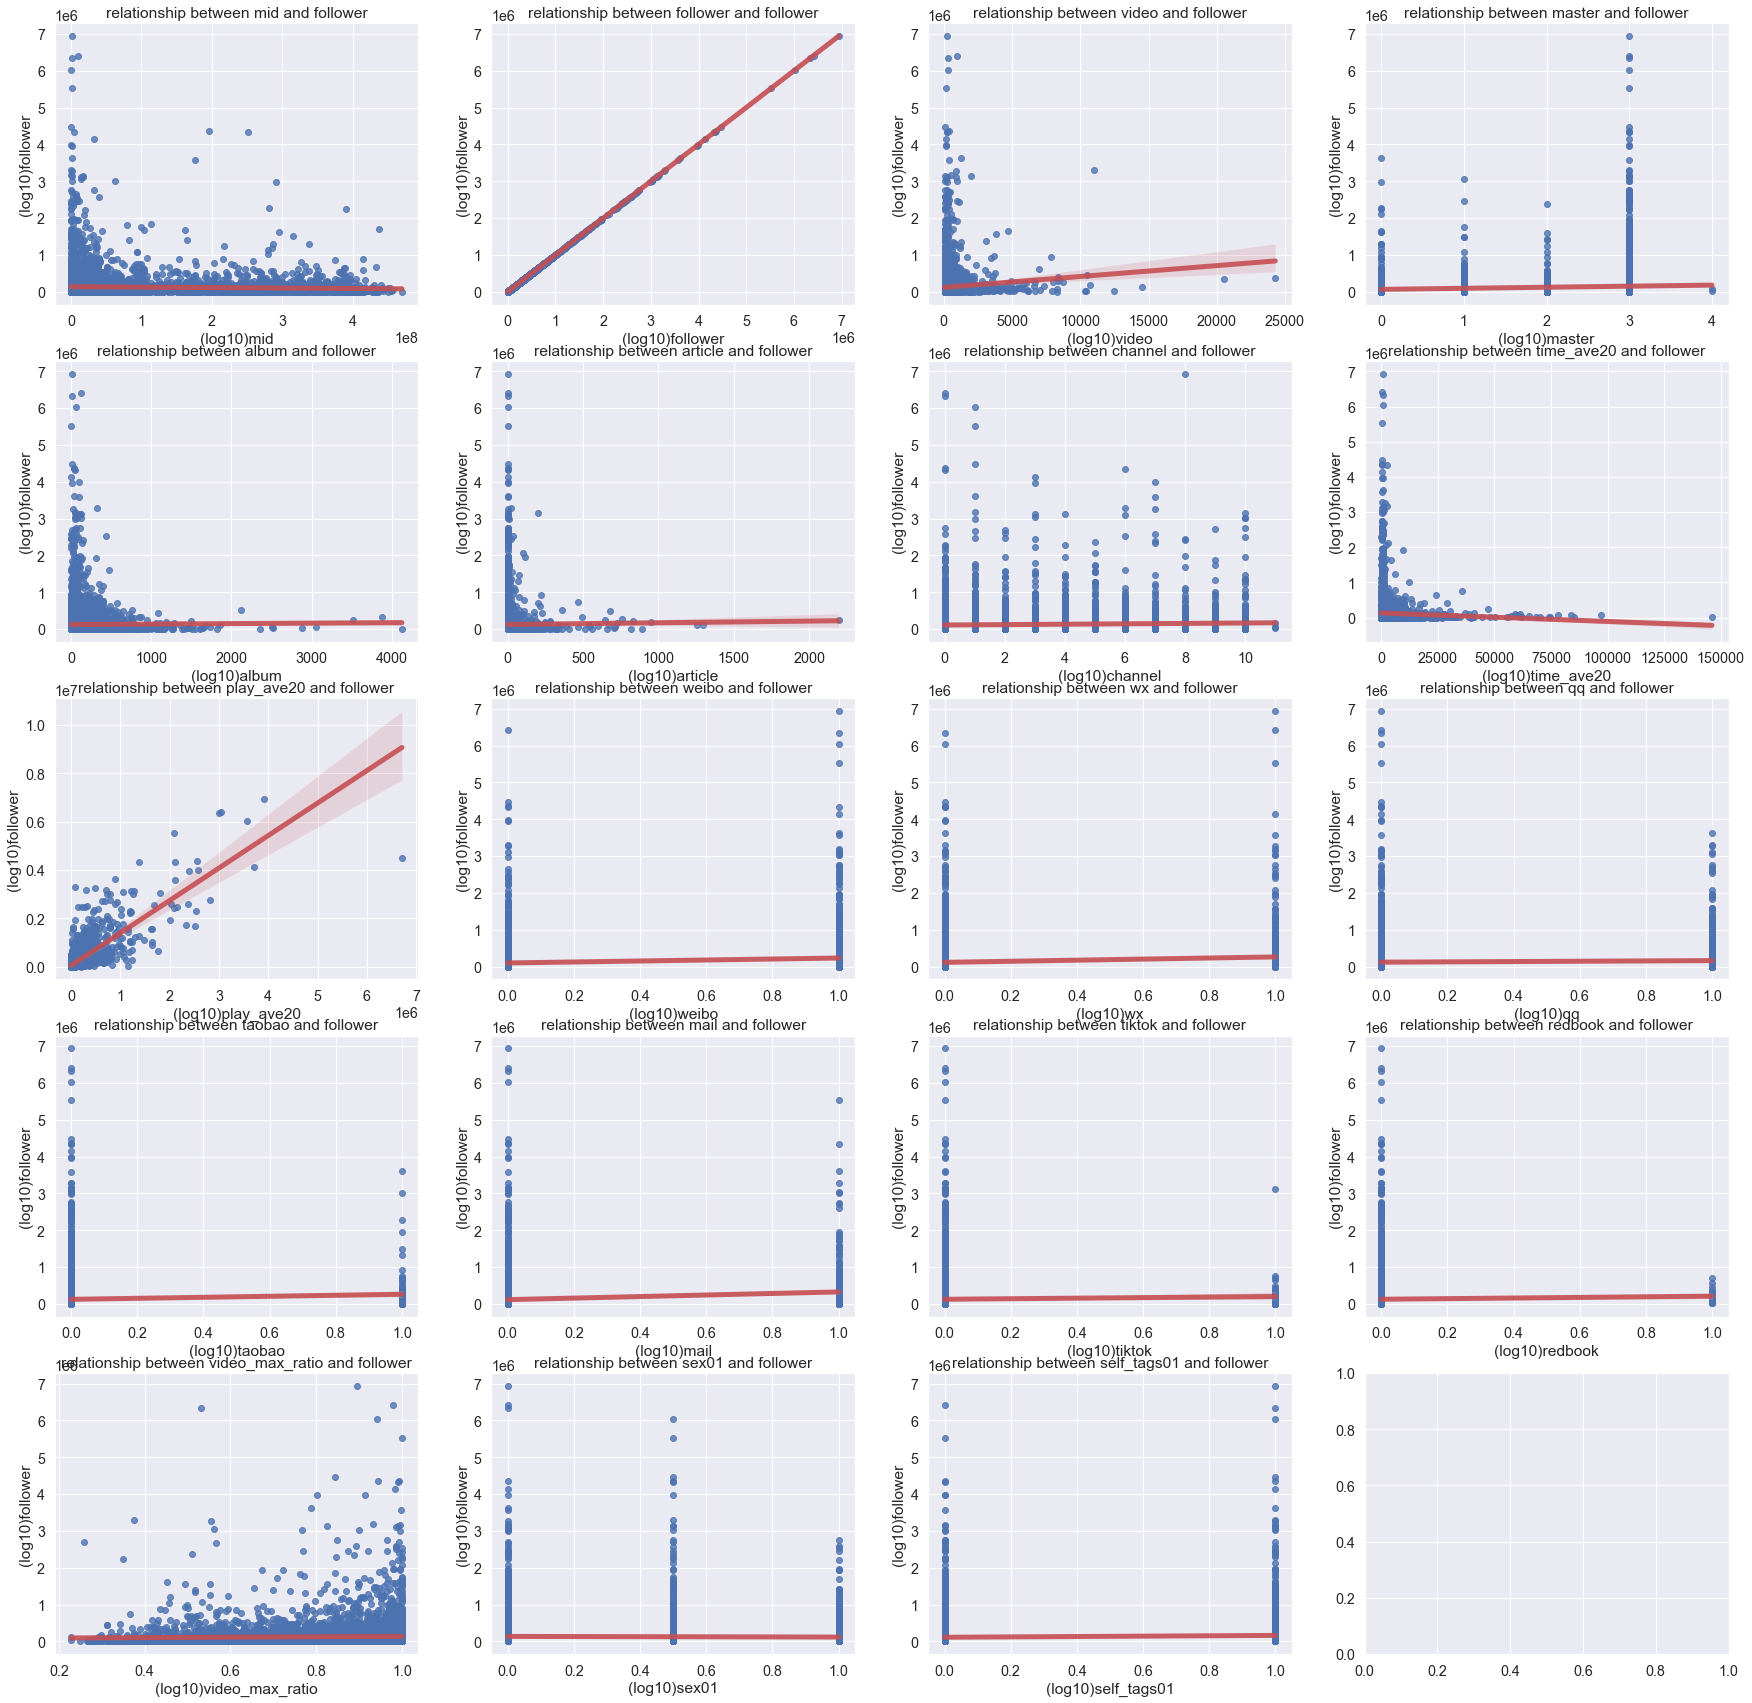

In [20]:
np.random.randn(len(bilibili['master']))/3
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(30, 30))
t = 0
for x in range(5):
    for y in range(4):
        if x == 4 and y == 3:
            break;
        plt.sca(ax[x][y])
        sns.regplot(x=bilibilix[list(bilibilix)[t]]
                    , y=bilibilix['follower'],line_kws={"color":"r","alpha":0.9,"lw":5})
        plt.xlabel('(log10)'+list(bilibilix)[t])
        plt.ylabel('(log10)follower')
        plt.title('relationship between ' + list(bilibilix)[t]+ ' and follower')
        t = t+1

取log后

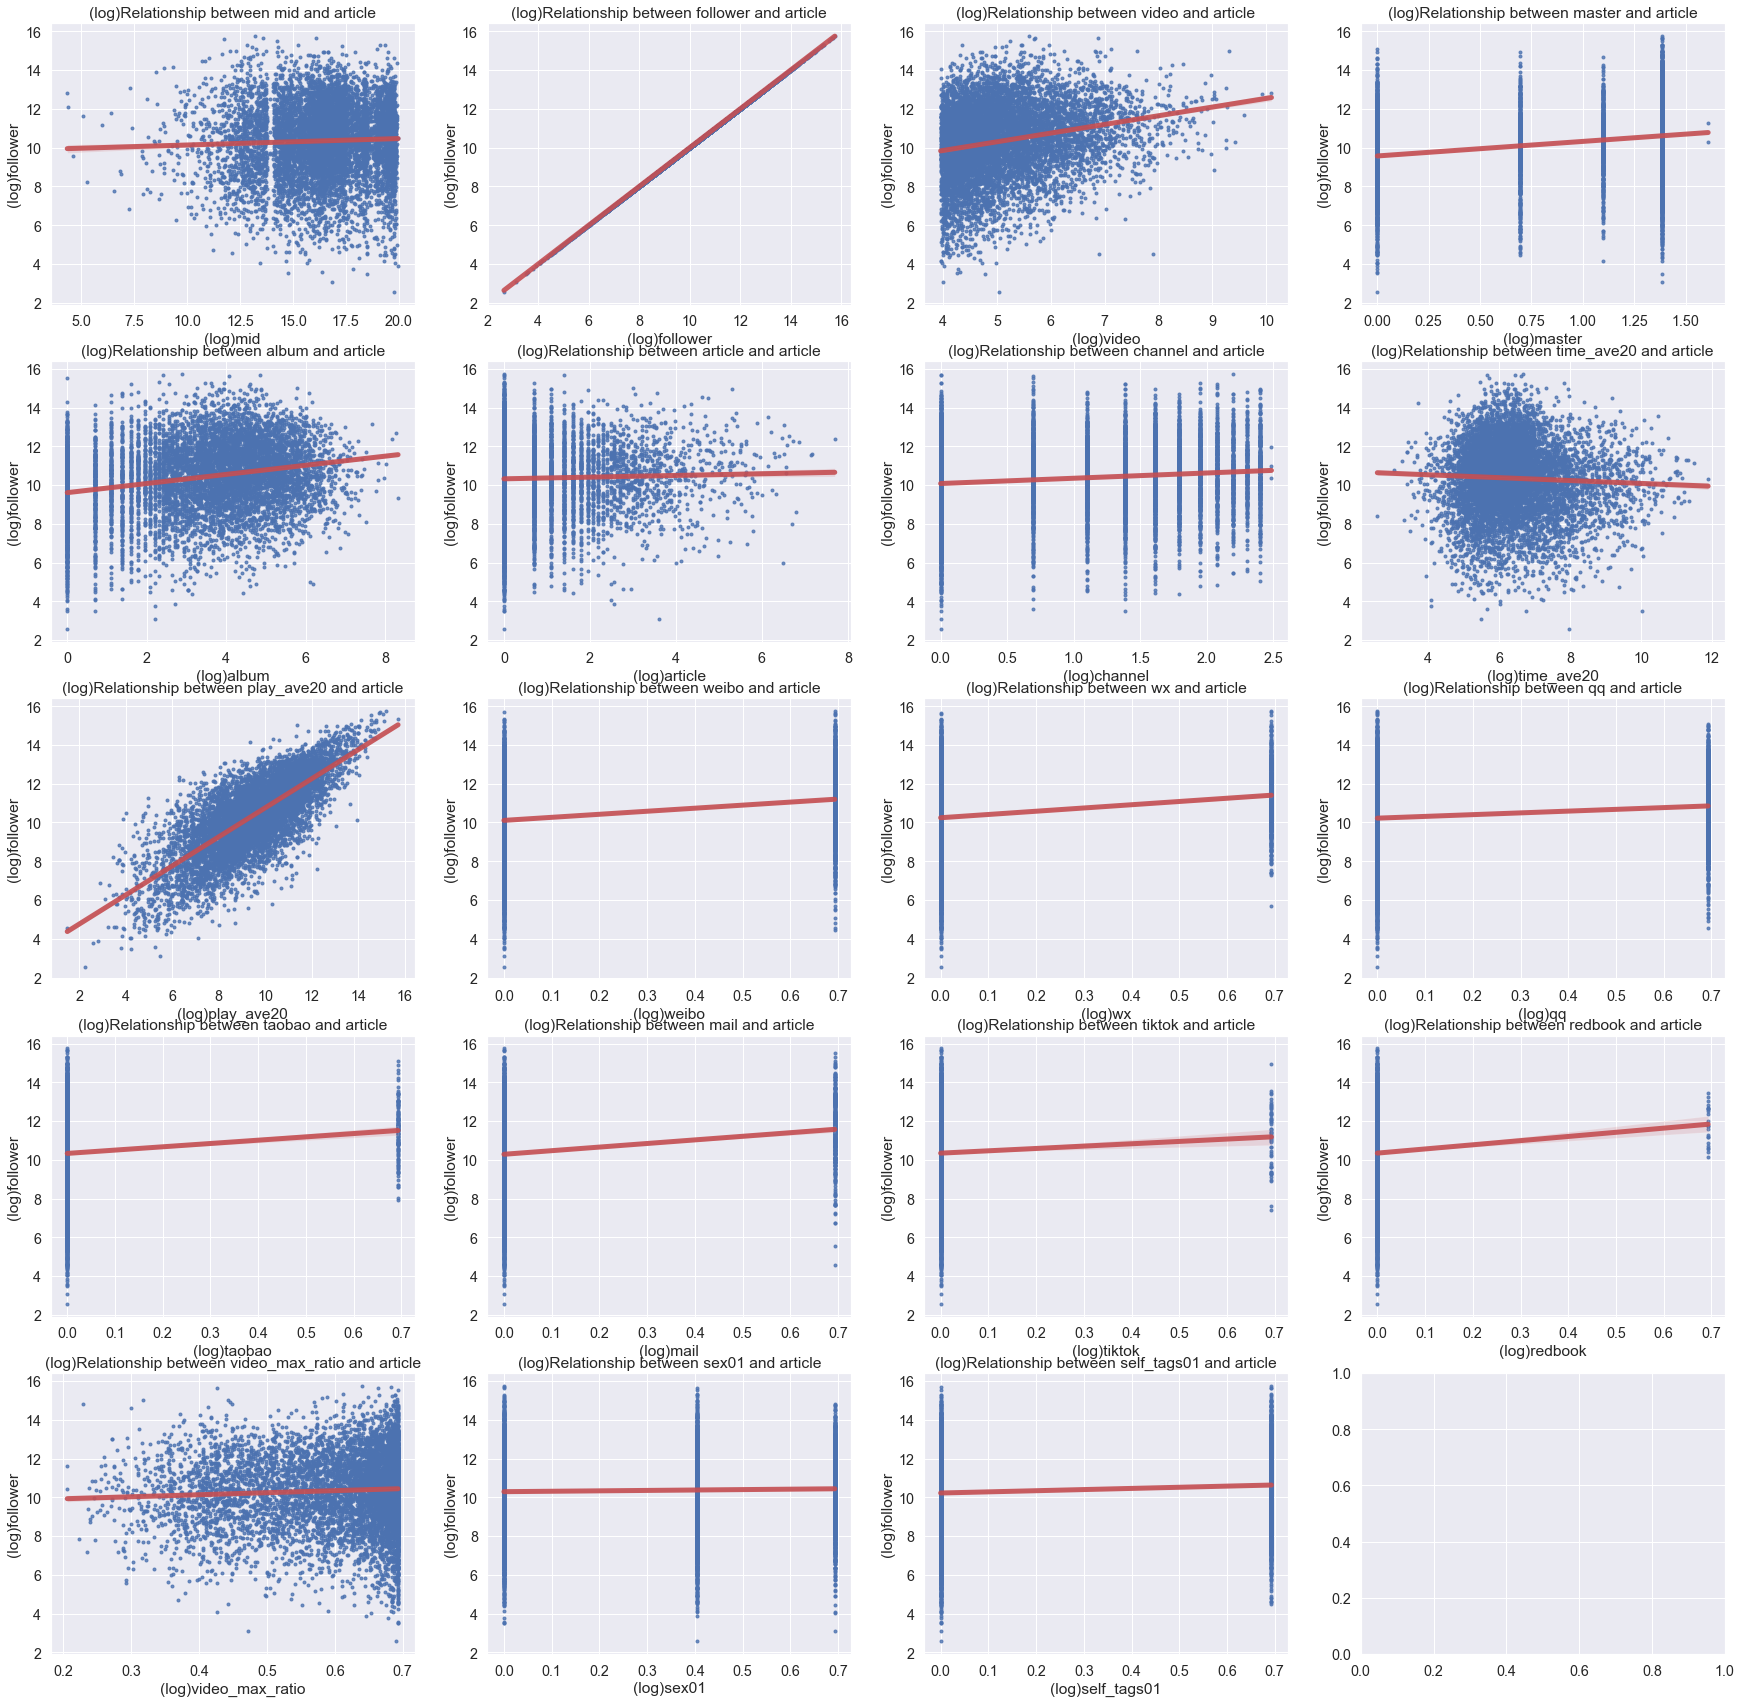

In [21]:
np.random.randn(len(bilibili['master']))/3
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(30, 30))
t = 0
for x in range(5):
    for y in range(4):
        if x == 4 and y == 3:
            break;
        plt.sca(ax[x][y])
        sns.regplot(x=np.log(bilibilix[list(bilibilix)[t]] + 1)
                    , y=np.log(bilibilix['follower']),line_kws={"color":"r","alpha":0.9,"lw":5},marker='.')
        plt.xlabel('(log)'+list(bilibilix)[t])
        plt.ylabel('(log)follower')
        plt.title('(log)Relationship between '+list(bilibilix)[t]+' and article')
        t = t+1

打乱后线性拟合

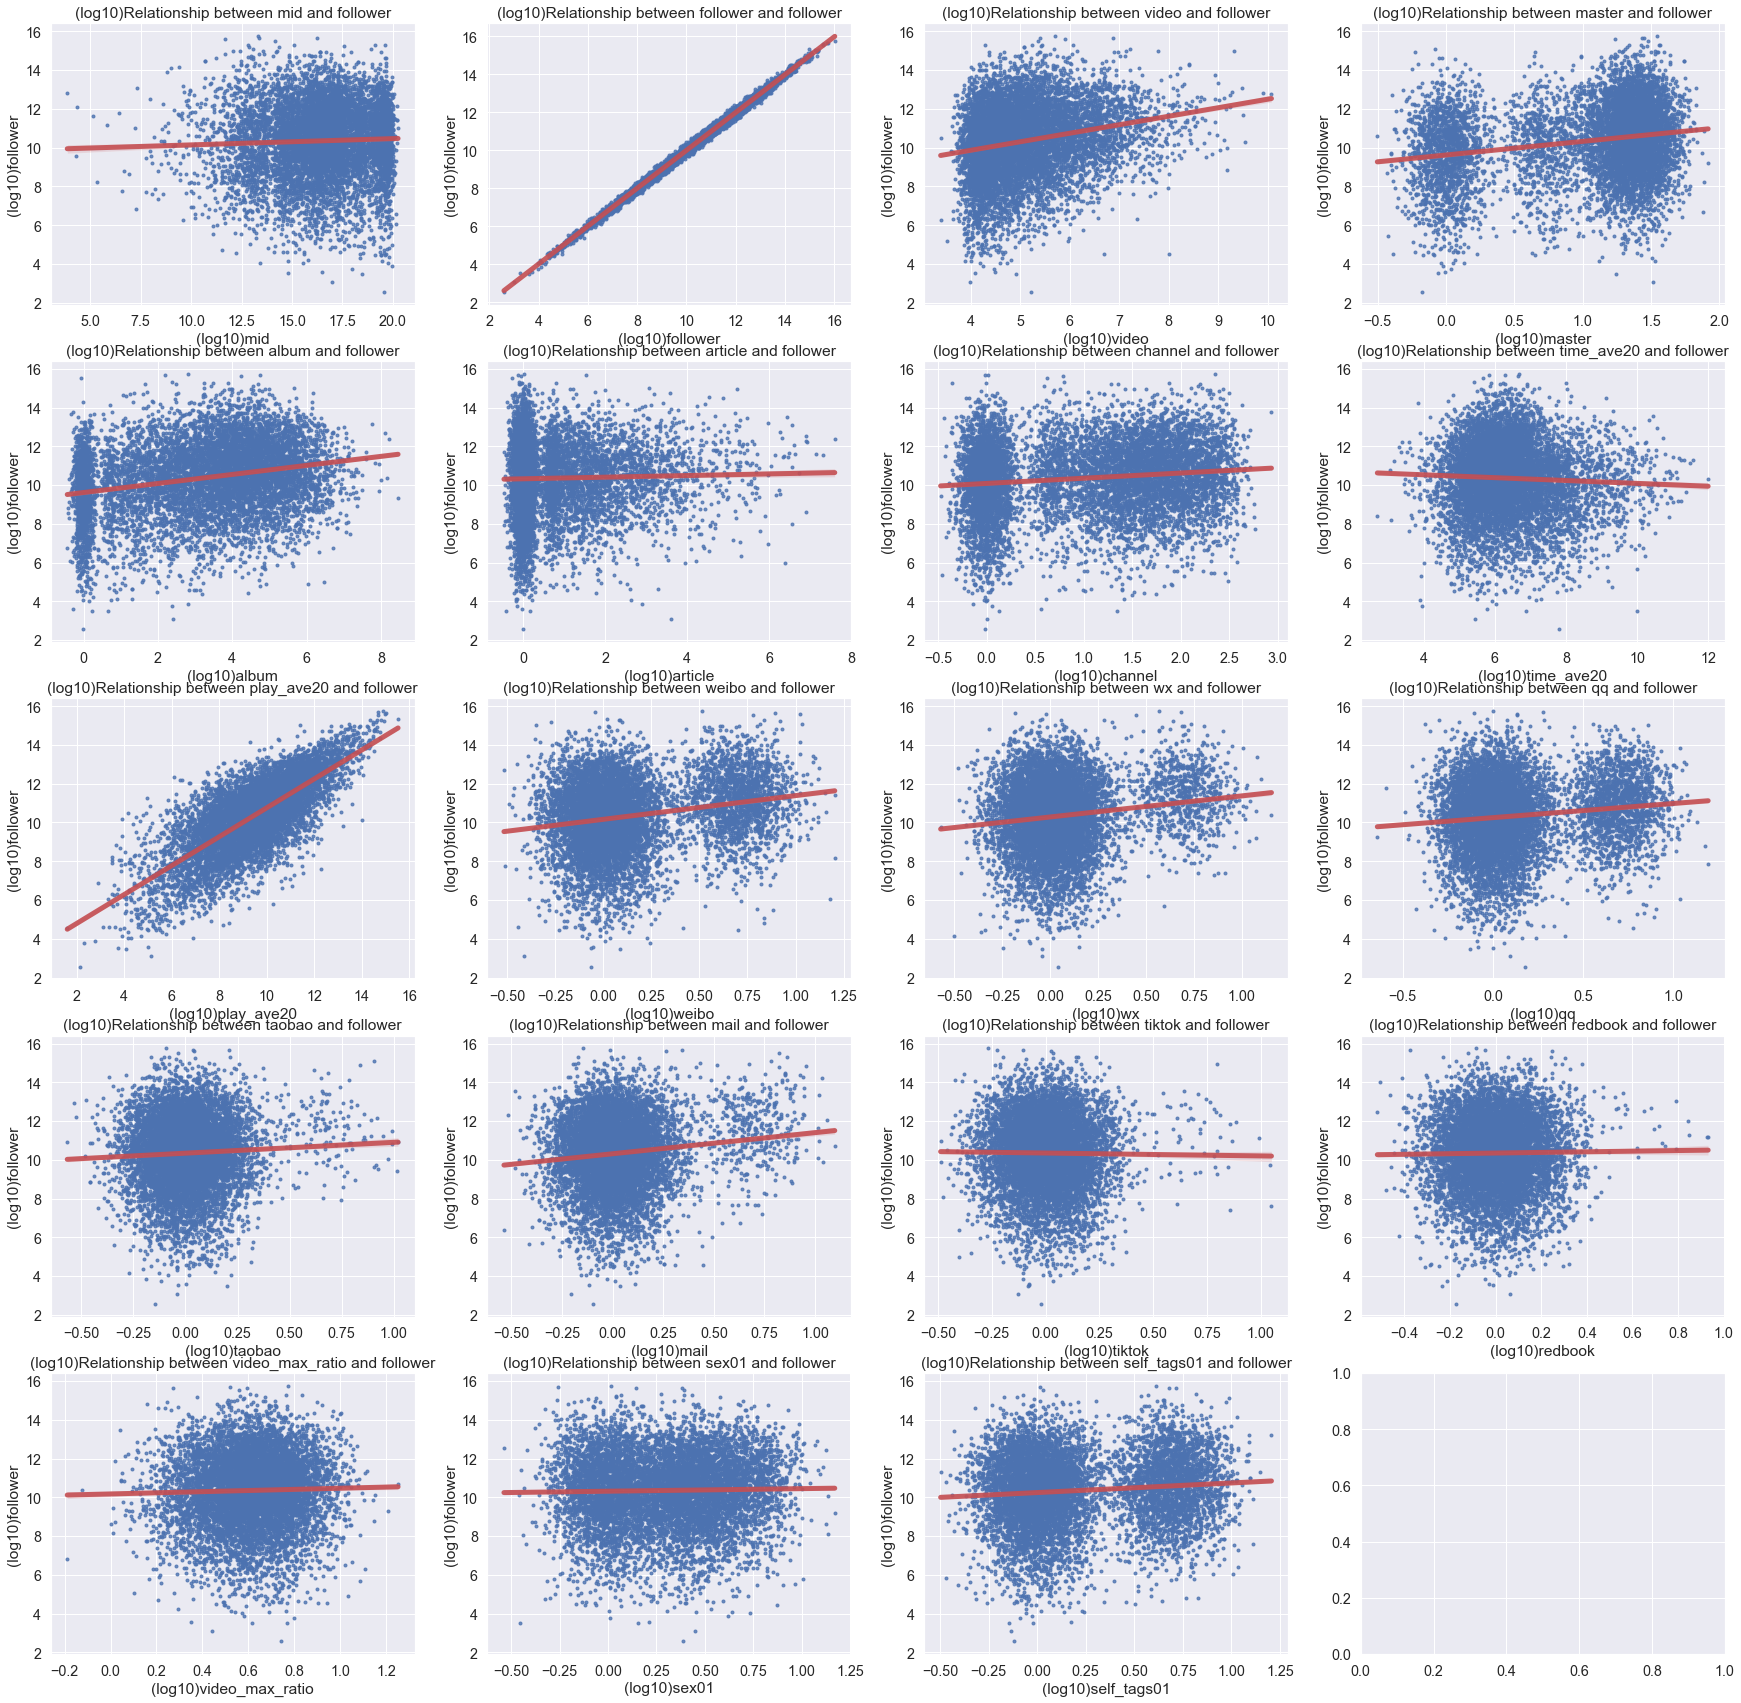

In [22]:
np.random.randn(len(bilibili['master']))/3
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(30, 30))
t = 0
for x in range(5):
    for y in range(4):
        if x == 4 and y == 3:
            break;
        plt.sca(ax[x][y])
        sns.regplot(x=np.log(bilibilix[list(bilibilix)[t]] + 1) + np.random.randn(len(bilibilix[list(bilibilix)[t]]))/7
                    , y=np.log(bilibili['follower']),line_kws={"color":"r","alpha":0.9,"lw":5},marker='.')
        plt.xlabel('(log10)'+list(bilibilix)[t])
        plt.ylabel('(log10)follower')
        plt.title('(log10)Relationship between '+list(bilibilix)[t]+' and follower')
        t = t+1

In [23]:
# plt.figure(figsize=(8, 6))
# # Make the font size a bit bigger
# sns.set(font_scale=1)
# # your code here
# sns.lmplot(data = bilibili, x = 'play_ave20', y = 'follower', ci=20, hue='sex01',height=7,scatter_kws={"s": 10});
# plt.title('')

Text(0.5, 1.0, 'follower distribution between self_taged')

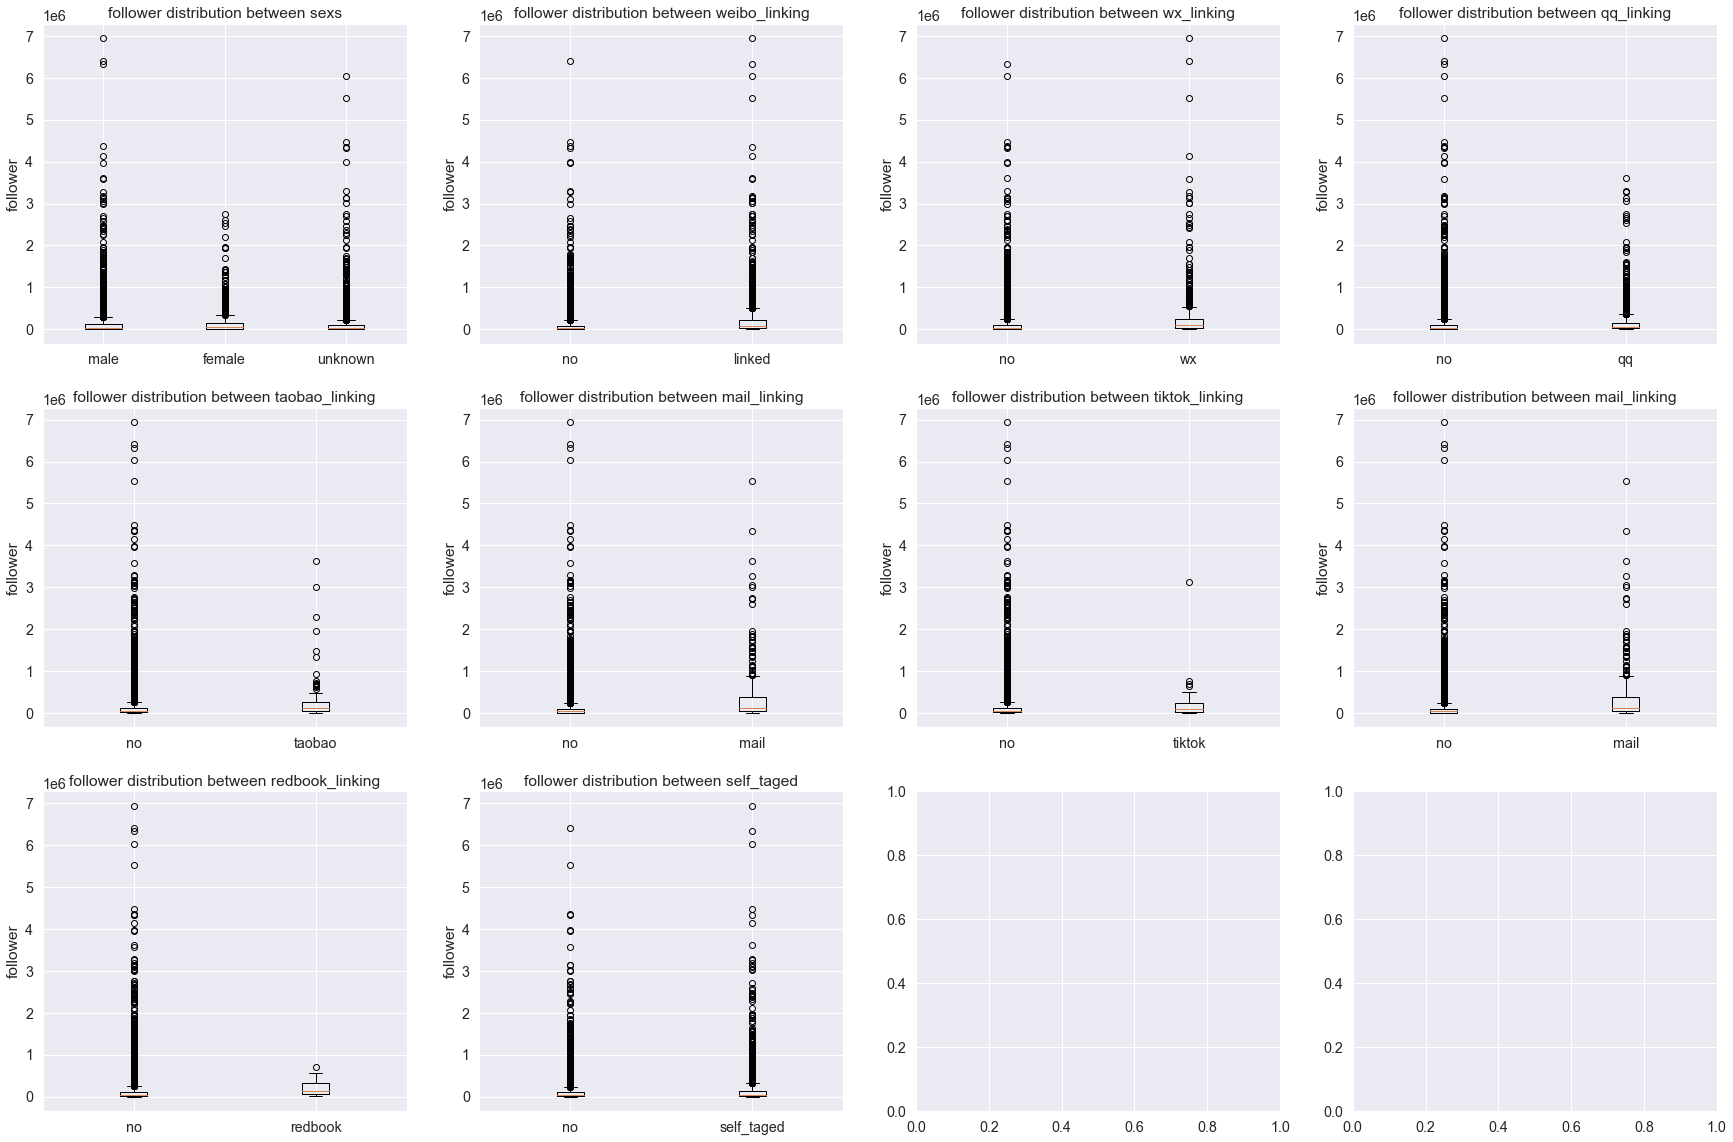

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(30, 20))
axes = ax[0][0]
axes.boxplot([bilibili['follower'][bilibili['sex01'] == 0],
              bilibili['follower'][bilibili['sex01'] == 1], 
              bilibili['follower'][bilibili['sex01'] == 0.5]])
axes.set_ylabel('follower')
axes.set_xticklabels(['male', 'female', 'unknown']);
axes.set_title('follower distribution between sexs')

axes = ax[0][1]
axes.boxplot([bilibili['follower'][bilibili['weibo'] == 0],
              bilibili['follower'][bilibili['weibo'] == 1], 
              ])
axes.set_ylabel('follower')
axes.set_xticklabels(['no','linked' ]);
axes.set_title('follower distribution between weibo_linking')

axes = ax[0][2]
axes.boxplot([bilibili['follower'][bilibili['wx'] == 0],
              bilibili['follower'][bilibili['wx'] == 1], 
              ])
axes.set_ylabel('follower')
axes.set_xticklabels([ 'no','wx']);
axes.set_title('follower distribution between wx_linking')

axes = ax[0][3]
axes.boxplot([bilibili['follower'][bilibili['qq'] == 0],
              bilibili['follower'][bilibili['qq'] == 1], 
              ])
axes.set_ylabel('follower')
axes.set_xticklabels(['no','qq' ]);
axes.set_title('follower distribution between qq_linking')

axes = ax[1][0]
axes.boxplot([bilibili['follower'][bilibili['taobao'] == 0],
              bilibili['follower'][bilibili['taobao'] == 1], 
              ])
axes.set_ylabel('follower')
axes.set_xticklabels([ 'no','taobao']);
axes.set_title('follower distribution between taobao_linking')

axes = ax[1][1]
axes.boxplot([bilibili['follower'][bilibili['mail'] == 0],
              bilibili['follower'][bilibili['mail'] == 1], 
              ])
axes.set_ylabel('follower')
axes.set_xticklabels([ 'no','mail']);
axes.set_title('follower distribution between mail_linking')

axes = ax[1][2]
axes.boxplot([bilibili['follower'][bilibili['tiktok'] == 0],
              bilibili['follower'][bilibili['tiktok'] == 1], 
              ])
axes.set_ylabel('follower')
axes.set_xticklabels([ 'no','tiktok']);
axes.set_title('follower distribution between tiktok_linking')

axes = ax[1][3]
axes.boxplot([bilibili['follower'][bilibili['mail'] == 0],
              bilibili['follower'][bilibili['mail'] == 1], 
              ])
axes.set_ylabel('follower')
axes.set_xticklabels([ 'no','mail']);
axes.set_title('follower distribution between mail_linking')

axes = ax[2][0]
axes.boxplot([bilibili['follower'][bilibili['redbook'] == 0],
              bilibili['follower'][bilibili['redbook'] == 1], 
              ])
axes.set_ylabel('follower')
axes.set_xticklabels([ 'no','redbook']);
axes.set_title('follower distribution between redbook_linking')

axes = ax[2][1]
axes.boxplot([bilibili['follower'][bilibili['self_tags01'] == 0],
              bilibili['follower'][bilibili['self_tags01'] == 1], 
              ])
axes.set_ylabel('follower')
axes.set_xticklabels([ 'no','self_taged']);
axes.set_title('follower distribution between self_taged')

# 近期平均播放时间 与 粉丝数

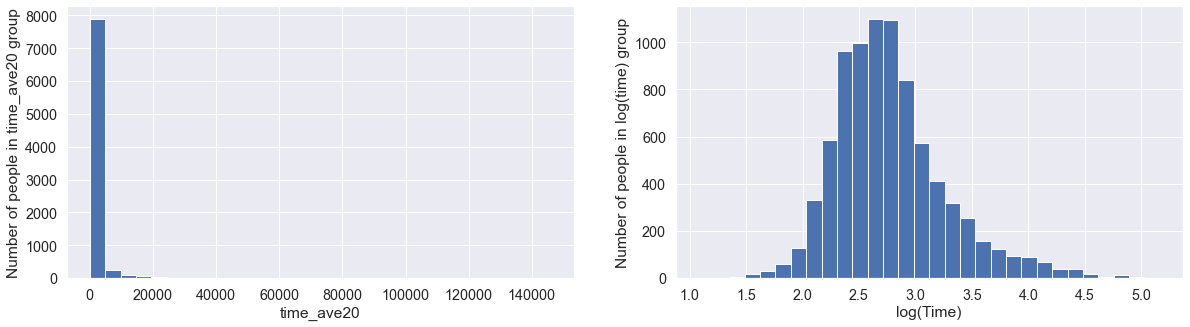

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Left subplot: Original income data
axes = ax[0]
axes.hist(bilibili['time_ave20'], 30, edgecolor="w")
axes.set_xlabel("time_ave20")
axes.set_ylabel("Number of people in time_ave20 group")

axes = ax[1]
axes.hist(np.log10(bilibili['time_ave20']), 30, edgecolor="w")
axes.set_xlabel("log(Time)")
axes.set_ylabel("Number of people in log(time) group");

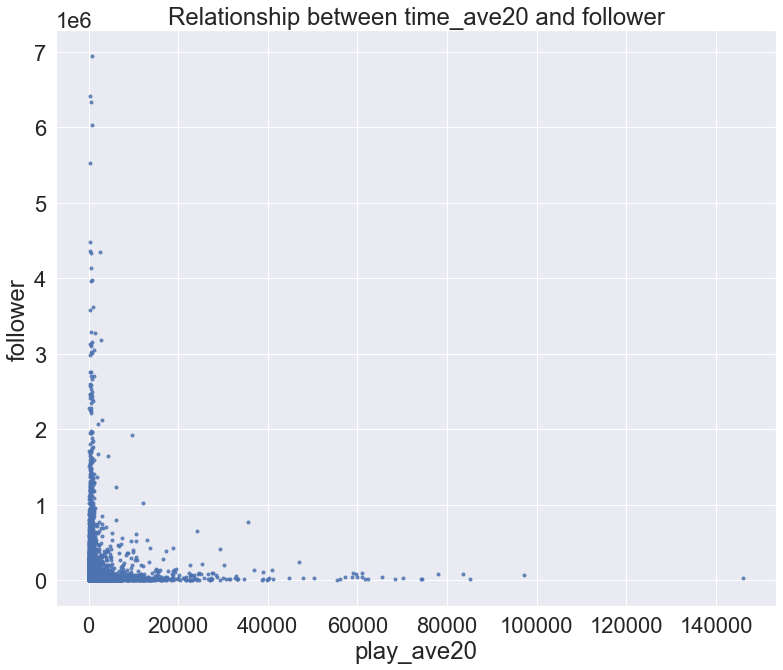

In [48]:
sns.set_theme(style='darkgrid', font_scale = 2,
              rc={'figure.figsize':(7,5)},color_codes='#919CA4, #454E68, #EEA370, #B8B2CA, #CB969D')
# library &amp; dataset
fig = plt.figure(figsize=(10, 8))
axes = fig.add_axes([0, 0, 1, 1])
# plot
sns.regplot(x=bilibili['time_ave20'], y=bilibili['follower'],fit_reg=False,marker='.')
plt.xlabel('play_ave20')
plt.ylabel('follower')
plt.title('Relationship between time_ave20 and follower')
plt.show()

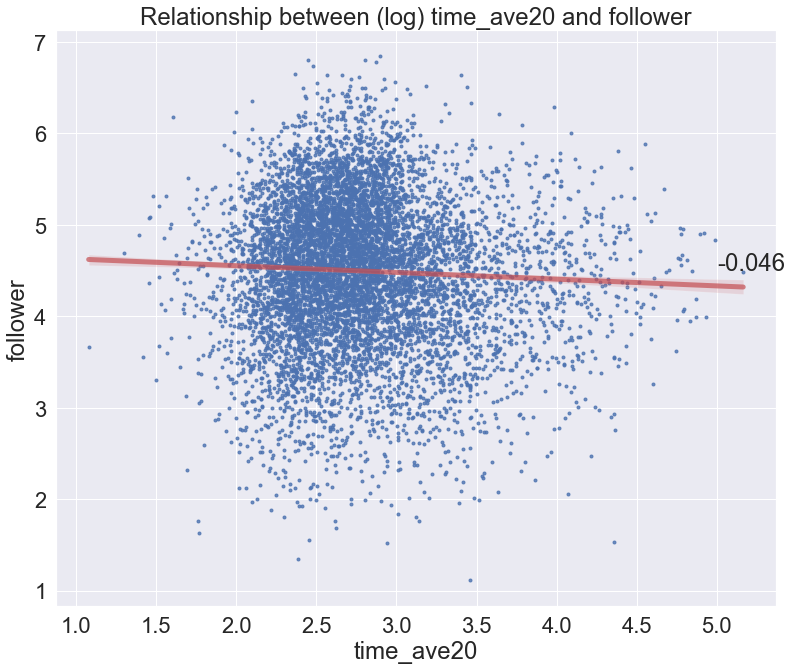

In [49]:
# library &amp; dataset
fig = plt.figure(figsize=(10, 8))
axes = fig.add_axes([0, 0, 1, 1])
# plot
sns.regplot(x=np.log10(bilibili['time_ave20']), y=np.log10(bilibili['follower']),line_kws={"color":"r","alpha":0.7,"lw":5},marker='.')
plt.xlabel('time_ave20')
plt.ylabel('follower')
plt.title('Relationship between (log) time_ave20 and follower')
slope, intercept, r_value, _, _ = stats.linregress(np.log10(bilibili['time_ave20']), np.log10(bilibili['follower']))
plt.text(5,4.5,str(round(r_value, 3)))
plt.show()

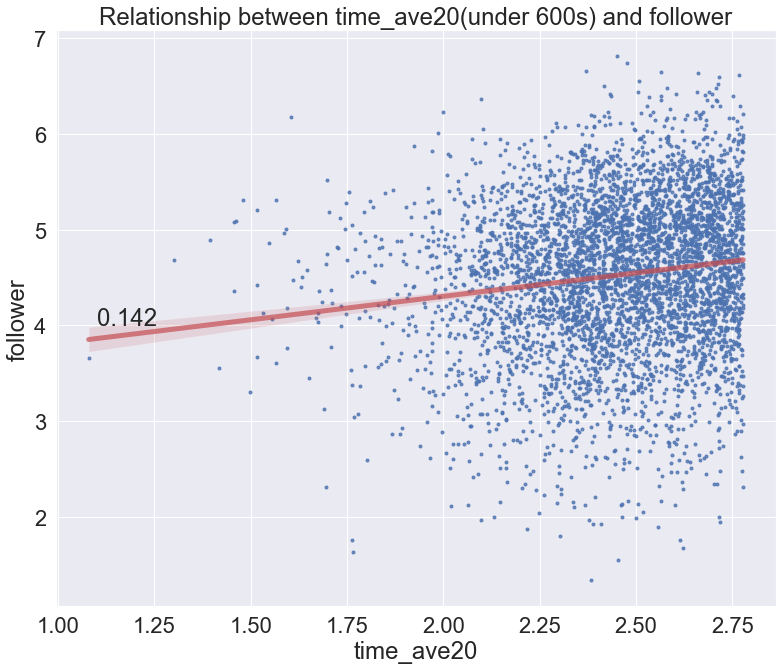

In [50]:
time10 = bilibili.drop(bilibili.loc[bilibili['time_ave20'] > 600].index)
# library &amp; dataset
fig = plt.figure(figsize=(10, 8))
axes = fig.add_axes([0, 0, 1, 1])
# plot
sns.regplot(x=np.log10(time10['time_ave20']), y=np.log10(time10['follower']),line_kws={"color":"r","alpha":0.7,"lw":5},marker='.')
plt.xlabel('time_ave20')
plt.ylabel('follower')
plt.title('Relationship between time_ave20(under 600s) and follower')
slope, intercept, r_value, _, _ = stats.linregress(np.log10(time10['time_ave20']), np.log10(time10['follower']))
plt.text(1.1,4,str(round(r_value, 3)))
plt.show()

In [51]:
timex = bilibili.drop(bilibili.loc[bilibili['time_ave20'] < 600].index)
timex.corr()

mid  follower     video    master     album   article  \
mid              1.000000 -0.054014 -0.059306 -0.047674 -0.017303 -0.007266   
follower        -0.054014  1.000000  0.060762  0.099676  0.010971  0.017801   
video           -0.059306  0.060762  1.000000 -0.010168  0.117537  0.026903   
master          -0.047674  0.099676 -0.010168  1.000000  0.129800  0.028576   
album           -0.017303  0.010971  0.117537  0.129800  1.000000  0.341946   
article         -0.007266  0.017801  0.026903  0.028576  0.341946  1.000000   
channel         -0.026467  0.058121  0.077749  0.334244  0.125917  0.078844   
time_ave20       0.011711 -0.053205  0.009125 -0.038034 -0.031345  0.012476   
play_ave20      -0.036015  0.828792 -0.031993  0.057785 -0.022993 -0.000666   
weibo           -0.067014  0.173264 -0.039142  0.221296  0.034052  0.027034   
wx               0.050217  0.140150  0.007216  0.135876  0.025163  0.084600   
qq              -0.003996  0.027078  0.007785  0.196530  0.139559  0.018092   
taobao          -0.040331  0.087279 -0.000804  0.038070  0.013510  0.014434   
mail            -0.003444  0.137014  0.020463  0.086033  0.040097  0.020828   
tiktok           0.002281  0.006054  0.001161  0.017800  0.004839 -0.004874   
redbook          0.054129  0.013307 -0.018616  0.036628 -0.012595 -0.006539   
video_max_ratio  0.037879  0.014544  0.049964  0.002558 -0.077817 -0.023481   
sex01            0.109837 -0.023954 -0.015580 -0.043678 -0.038199 -0.011307   
self_tags01     -0.147989  0.097686  0.038931  0.235873  0.045760  0.002651   
random_master   -0.045650  0.096300 -0.008654  0.979289  0.128141  0.030898   

                  channel  time_ave20  play_ave20     weibo        wx  \
mid             -0.026467    0.011711   -0.036015 -0.067014  0.050217   
follower         0.058121   -0.053205    0.828792  0.173264  0.140150   
video            0.077749    0.009125   -0.031993 -0.039142  0.007216   
master           0.334244   -0.038034    0.057785  0.221296  0.135876   
album            0.125917   -0.031345   -0.022993  0.034052  0.025163   
article          0.078844    0.012476   -0.000666  0.027034  0.084600   
channel          1.000000    0.015684    0.000151  0.137289  0.108110   
time_ave20       0.015684    1.000000   -0.043874 -0.031126 -0.048927   
play_ave20       0.000151   -0.043874    1.000000  0.127439  0.086181   
weibo            0.137289   -0.031126    0.127439  1.000000  0.262532   
wx               0.108110   -0.048927    0.086181  0.262532  1.000000   
qq               0.183243    0.008799    0.014074  0.245520  0.103602   
taobao           0.047729   -0.003255    0.047927  0.121837  0.187537   
mail             0.062763   -0.030432    0.089220  0.262911  0.132653   
tiktok           0.012391   -0.014092    0.014164  0.085617  0.068991   
redbook         -0.006762   -0.022356    0.003860  0.122788  0.055665   
video_max_ratio -0.017356    0.049857   -0.015605 -0.004880  0.010108   
sex01           -0.059398   -0.016336   -0.036749  0.011427  0.032238   
self_tags01      0.220582   -0.019710    0.060166  0.214729  0.074421   
random_master    0.327875   -0.038261    0.052464  0.215689  0.132950   

                       qq    taobao      mail    tiktok   redbook  \
mid             -0.003996 -0.040331 -0.003444  0.002281  0.054129   
follower         0.027078  0.087279  0.137014  0.006054  0.013307   
video            0.007785 -0.000804  0.020463  0.001161 -0.018616   
master           0.196530  0.038070  0.086033  0.017800  0.036628   
album            0.139559  0.013510  0.040097  0.004839 -0.012595   
article          0.018092  0.014434  0.020828 -0.004874 -0.006539   
channel          0.183243  0.047729  0.062763  0.012391 -0.006762   
time_ave20       0.008799 -0.003255 -0.030432 -0.014092 -0.022356   
play_ave20       0.014074  0.047927  0.089220  0.014164  0.003860   
weibo            0.245520  0.121837  0.262911  0.085617  0.122788   
wx               0.103602  0.187537  0.132653  0.068991  0.055665   


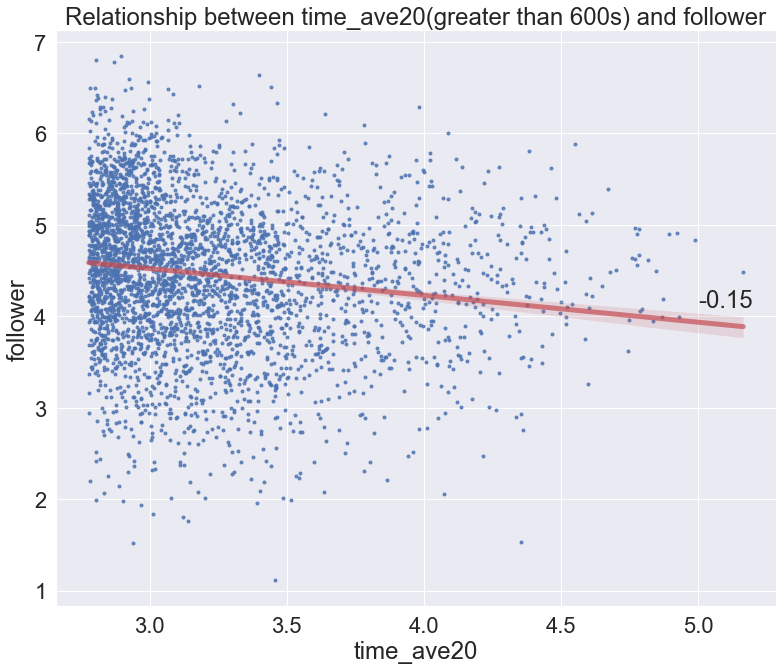

In [52]:
timex = bilibili.drop(bilibili.loc[bilibili['time_ave20'] < 600].index)
# library &amp; dataset
fig = plt.figure(figsize=(10, 8))
axes = fig.add_axes([0, 0, 1, 1])
# plot
sns.regplot(x=np.log10(timex['time_ave20']), y=np.log10(timex['follower']),line_kws={"color":"r","alpha":0.7,"lw":5},marker='.')
plt.xlabel('time_ave20')
plt.ylabel('follower')
plt.title('Relationship between time_ave20(greater than 600s) and follower')
slope, intercept, r_value, _, _ = stats.linregress(np.log10(timex['time_ave20']), np.log10(timex['follower']))
plt.text(5,4.1,str(round(r_value, 3)))
plt.show()

无明显相关关系

# 近期平均播放量 与 粉丝数关系

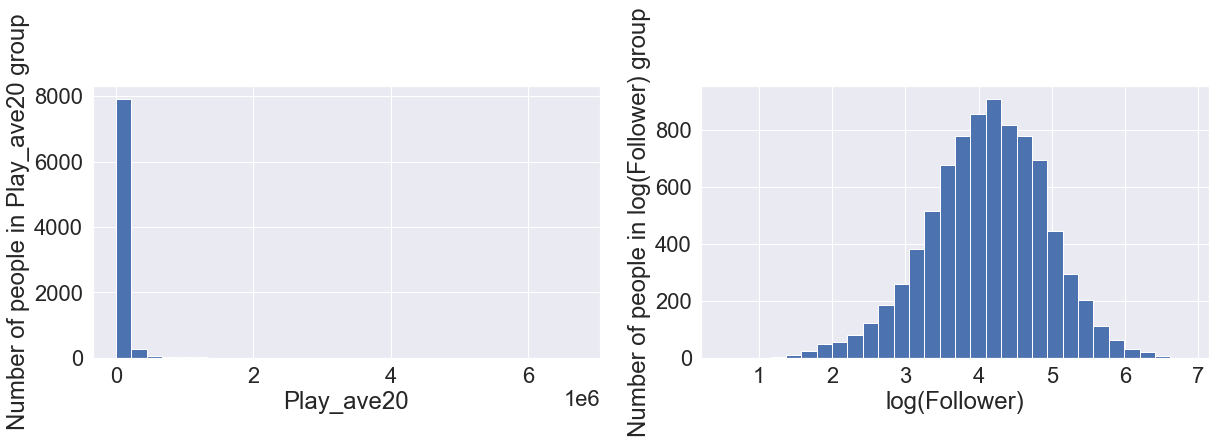

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Left subplot: Original income data
axes = ax[0]
axes.hist(bilibili['play_ave20'], 30, edgecolor="w")
axes.set_xlabel("Play_ave20")
axes.set_ylabel("Number of people in Play_ave20 group")

axes = ax[1]
axes.hist(np.log10(bilibili['play_ave20']), 30, edgecolor="w")
axes.set_xlabel("log(Follower)")
axes.set_ylabel("Number of people in log(Follower) group");

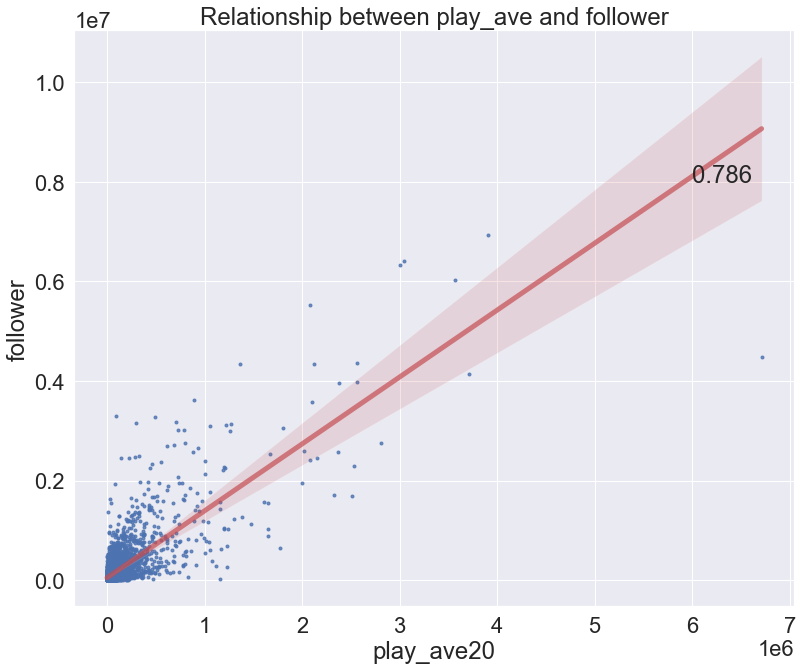

In [54]:

# library &amp; dataset
fig = plt.figure(figsize=(10, 8))
axes = fig.add_axes([0, 0, 1, 1])
# plot
sns.regplot(x=bilibili['play_ave20'], y=bilibili['follower'], line_kws={"color":"r","alpha":0.7,"lw":5},marker='.')
plt.xlabel('play_ave20')
plt.ylabel('follower')
plt.title('Relationship between play_ave and follower')
slope, intercept, r_value, _, _ = stats.linregress(bilibili['play_ave20'], bilibili['follower'])
plt.text(6e6,0.8e7,str(round(r_value, 3)))
plt.show()

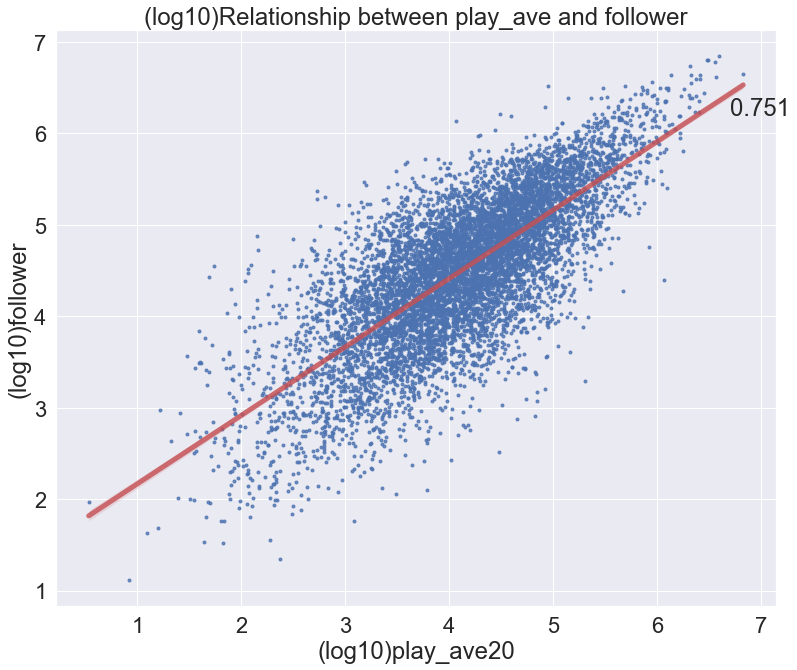

In [55]:
# library &amp; dataset
fig = plt.figure(figsize=(10, 8))
axes = fig.add_axes([0, 0, 1, 1])
# plot
sns.regplot(x=np.log10(bilibili['play_ave20']), y=np.log10(bilibili['follower']), line_kws={"color":"r","alpha":0.8,"lw":5},marker='.')

plt.xlabel('(log10)play_ave20')
plt.ylabel('(log10)follower')
plt.title('(log10)Relationship between play_ave and follower')
slope, intercept, r_value, _, _ = stats.linregress(np.log10(bilibili['play_ave20']),np.log10(bilibili['follower']))
plt.text(6.7,6.2,str(round(r_value, 3)))
plt.show()

二者在log变换后可看出，极大相关，符合一般认知

# 代表作个数 与 粉丝数关系

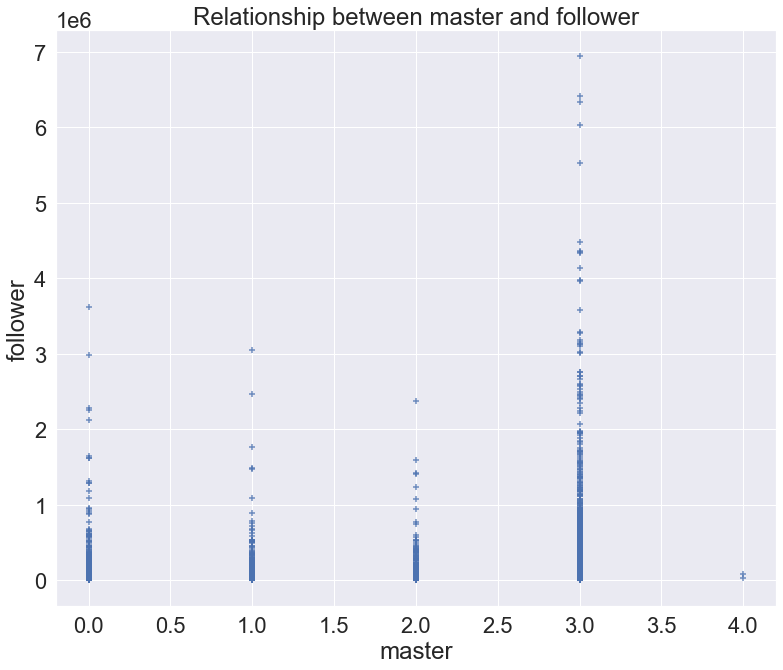

In [56]:
# library &amp; dataset
fig = plt.figure(figsize=(10, 8))
axes = fig.add_axes([0, 0, 1, 1])
# plot
sns.regplot(x=bilibili['master'], y=bilibili['follower'],fit_reg=False,marker='+')

plt.xlabel('master')
plt.ylabel('follower')
plt.title('Relationship between master and follower')
plt.show()

将代表作个数水平打乱

In [57]:
bilibili['random_master'] = bilibili['master'] + np.random.randn(len(bilibili['master']))/4

C:\Users\GC\AppData\Local\Temp\ipykernel_21324\2197501427.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot( 'random_master', 'follower', "", data=bilibili, linestyle='', marker='o',alpha=0.3)


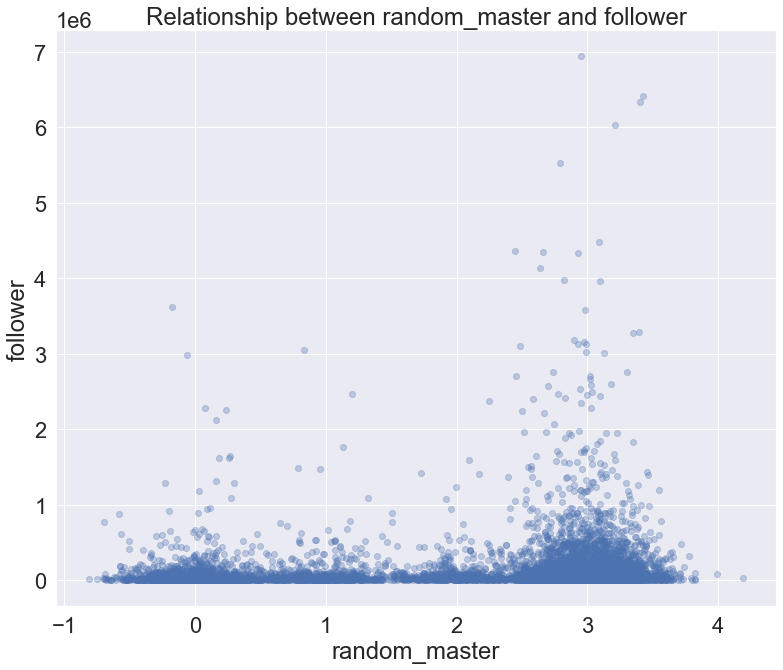

In [58]:
fig = plt.figure(figsize=(10, 8))
axes = fig.add_axes([0, 0, 1, 1])
# plot
plt.plot( 'random_master', 'follower', "", data=bilibili, linestyle='', marker='o',alpha=0.3)
plt.xlabel('random_master')
plt.ylabel('follower')
plt.title('Relationship between random_master and follower')
plt.show()

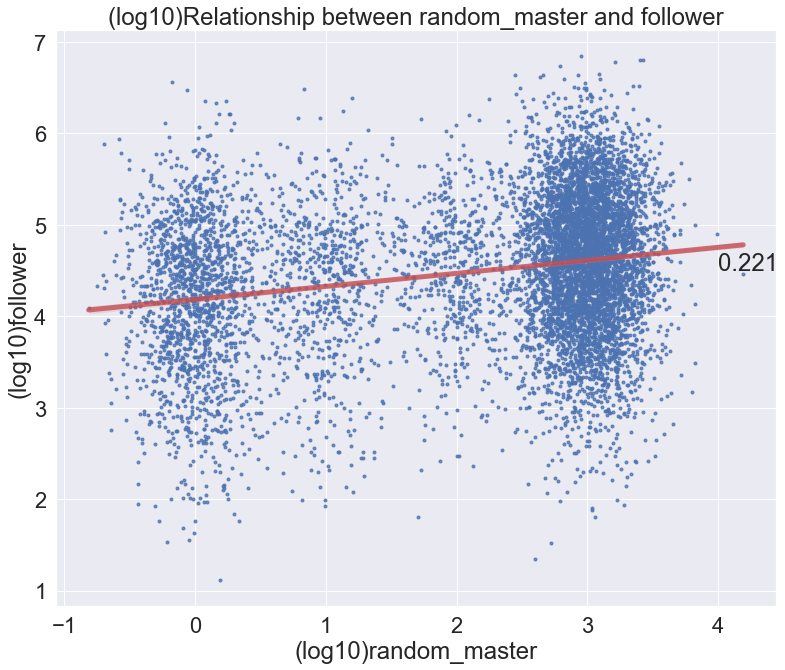

In [59]:
# library &amp; dataset
fig = plt.figure(figsize=(10, 8))
axes = fig.add_axes([0, 0, 1, 1])
# plot
sns.regplot(x=bilibili['random_master'], y=np.log10(bilibili['follower']), line_kws={"color":"r","alpha":0.8,"lw":5},marker='.')

plt.xlabel('(log10)random_master')
plt.ylabel('(log10)follower')
plt.title('(log10)Relationship between random_master and follower')
slope, intercept, r_value, _, _ = stats.linregress(bilibili['random_master'], np.log10(bilibili['follower']))
plt.text(4,4.5,str(round(r_value, 3)))
plt.show()

# 发布文章数 与 照片数 关系

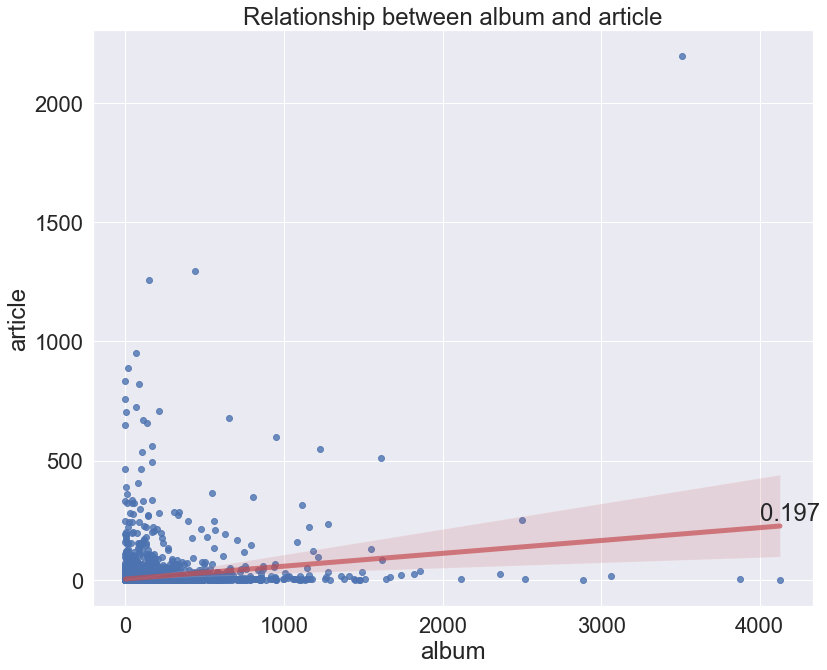

In [60]:
# library &amp; dataset
fig = plt.figure(figsize=(10, 8))
axes = fig.add_axes([0, 0, 1, 1])
# plot
sns.regplot(x=bilibili['album'], y=bilibili['article'], line_kws={"color":"r","alpha":0.7,"lw":5})

plt.xlabel('album')
plt.ylabel('article')
plt.title('Relationship between album and article')
slope, intercept, r_value, _, _ = stats.linregress(bilibili['album'], bilibili['article'])
plt.text(4000,250,str(round(r_value, 3)))
plt.show()

取log

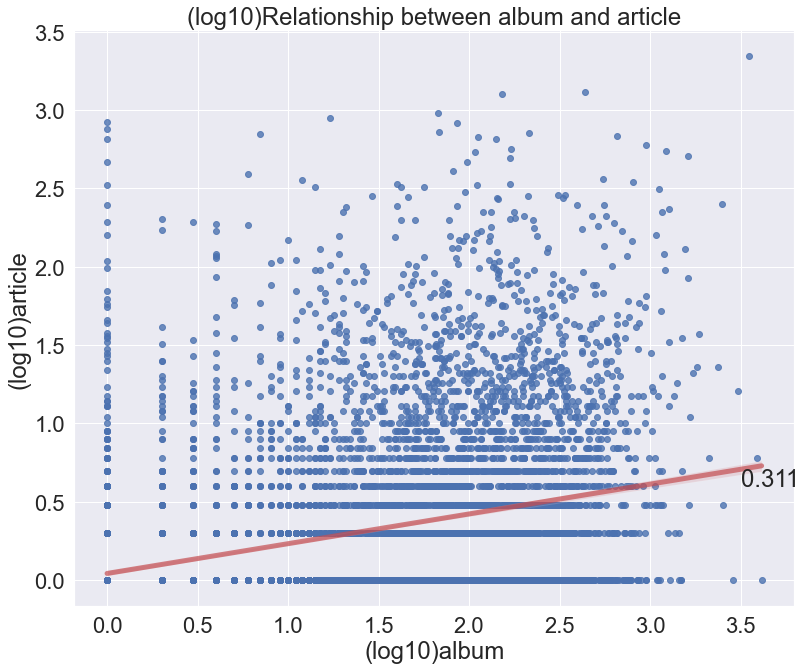

In [61]:
# library &amp; dataset
fig = plt.figure(figsize=(10, 8))
axes = fig.add_axes([0, 0, 1, 1])
# plot
sns.regplot(x=np.log10(bilibili['album'] + 1), y=np.log10(bilibili['article'] + 1), line_kws={"color":"r","alpha":0.7,"lw":5})

plt.xlabel('(log10)album')
plt.ylabel('(log10)article')
plt.title('(log10)Relationship between album and article')
slope, intercept, r_value, _, _ = stats.linregress(np.log10(bilibili['album'] + 1), np.log10(bilibili['article'] + 1))
plt.text(3.5,0.6,str(round(r_value, 3)))
plt.show()

# 近期视频平均时长 与 近期视频平均播放量

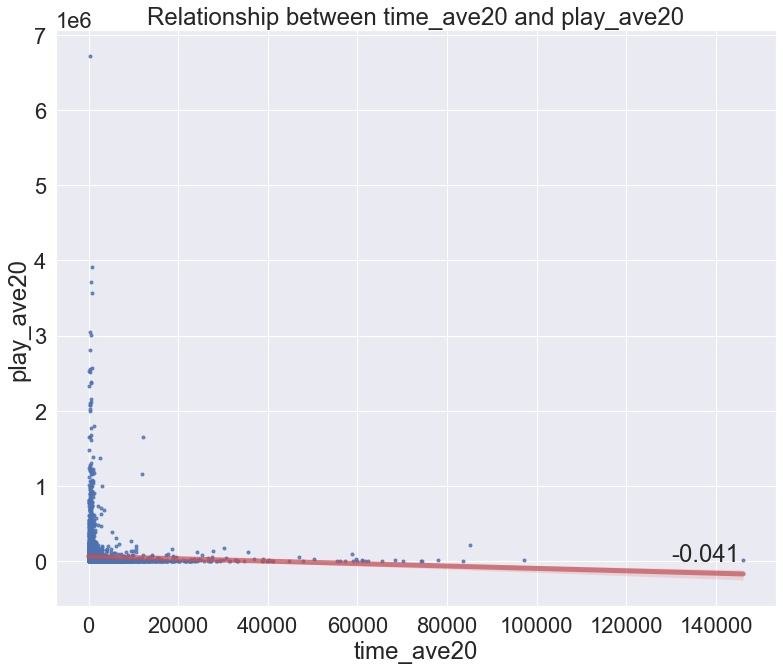

In [62]:
# library &amp; dataset
fig = plt.figure(figsize=(10, 8))
axes = fig.add_axes([0, 0, 1, 1])
# plot
sns.regplot(x=bilibili['time_ave20'], y=bilibili['play_ave20'], line_kws={"color":"r","alpha":0.7,"lw":5},marker='.')
plt.xlabel('time_ave20')
plt.ylabel('play_ave20')
plt.title('Relationship between time_ave20 and play_ave20')
slope, intercept, r_value, _, _ = stats.linregress(bilibili['time_ave20'], bilibili['play_ave20'])
plt.text(130000,0,str(round(r_value, 3)))
plt.show()

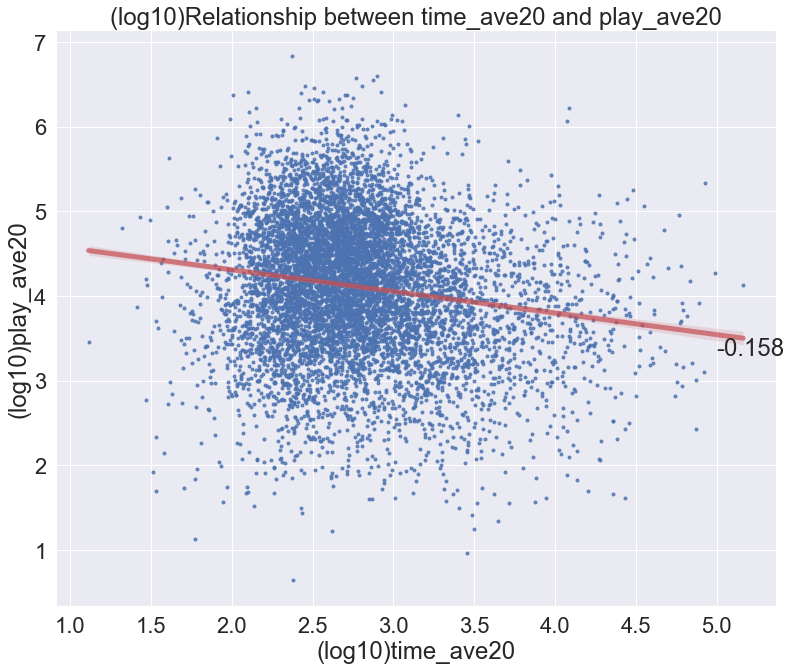

In [63]:
# library &amp; dataset
fig = plt.figure(figsize=(10, 8))
axes = fig.add_axes([0, 0, 1, 1])
# plot
sns.regplot(x=np.log10(bilibili['time_ave20'] + 1), y=np.log10(bilibili['play_ave20'] + 1), line_kws={"color":"r","alpha":0.7,"lw":5},marker='.')

plt.xlabel('(log10)time_ave20')
plt.ylabel('(log10)play_ave20')
plt.title('(log10)Relationship between time_ave20 and play_ave20')
slope, intercept, r_value, _, _ = stats.linregress(np.log10(bilibili['time_ave20'] + 1), np.log10(bilibili['play_ave20'] + 1))
plt.text(5,3.3,str(round(r_value, 3)))
plt.show()

In [64]:
timex = bilibili.drop(bilibili.loc[bilibili['time_ave20'] > 500].index)
timex['time_log'] = np.log10(timex['time_ave20'])
timex.corr()['time_ave20']['play_ave20']

0.04165169469381959

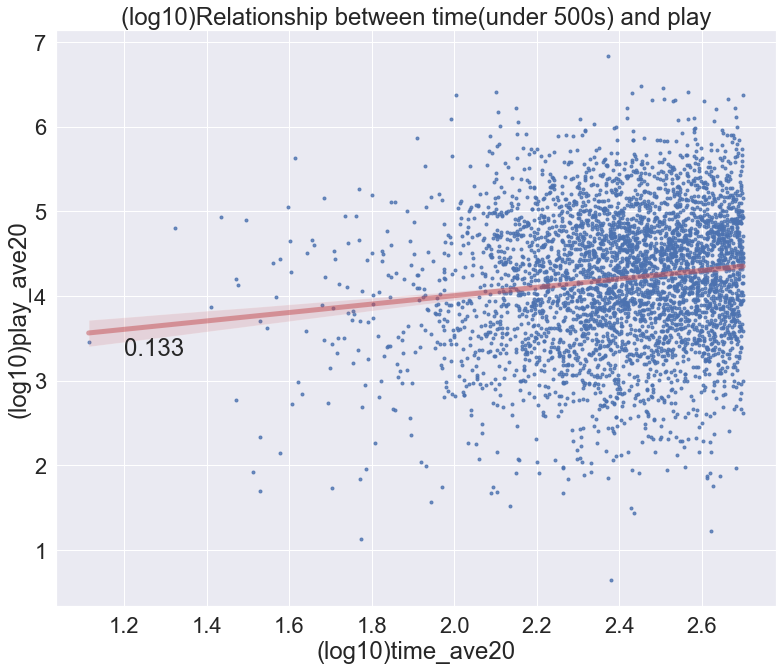

In [65]:
# library &amp; dataset
fig = plt.figure(figsize=(10, 8))
axes = fig.add_axes([0, 0, 1, 1])
# plot
sns.regplot(x=np.log10(timex['time_ave20'] + 1), y=np.log10(timex['play_ave20'] + 1), line_kws={"color":"r","alpha":0.5,"lw":5},marker='.')

plt.xlabel('(log10)time_ave20')
plt.ylabel('(log10)play_ave20')
plt.title('(log10)Relationship between time(under 500s) and play')
slope, intercept, r_value, _, _ = stats.linregress(np.log10(timex['time_ave20'] + 1), np.log10(timex['play_ave20'] + 1))
plt.text(1.2,3.3,str(round(r_value, 3)))
plt.show()

In [66]:
timex = bilibili.drop(bilibili.loc[bilibili['time_ave20'] < 500].index)
timex['time_log'] = np.log10(timex['time_ave20'])
timex.corr()['time_ave20']['play_ave20']

-0.0447988056647387

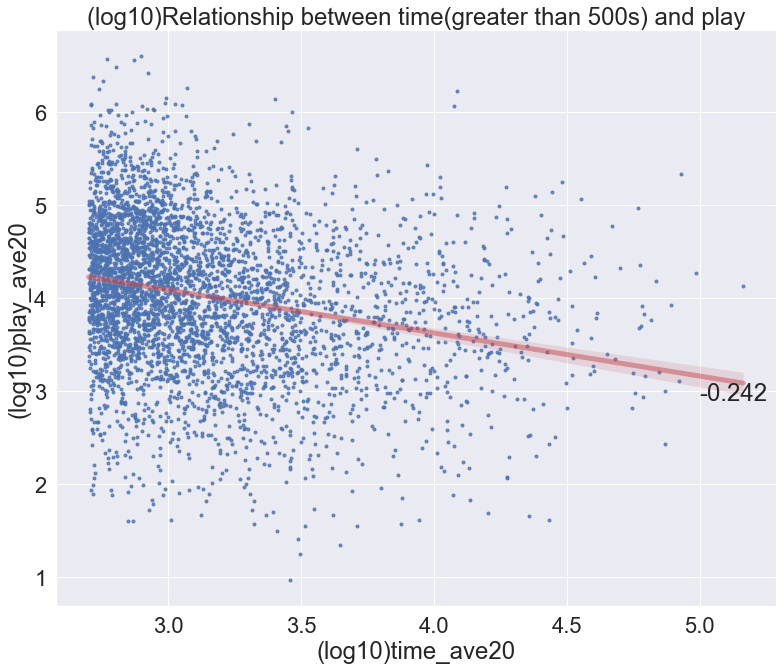

In [67]:
# library &amp; dataset
fig = plt.figure(figsize=(10, 8))
axes = fig.add_axes([0, 0, 1, 1])
# plot
sns.regplot(x=np.log10(timex['time_ave20'] + 1), y=np.log10(timex['play_ave20'] + 1), line_kws={"color":"r","alpha":0.5,"lw":5},marker='.')

plt.xlabel('(log10)time_ave20')
plt.ylabel('(log10)play_ave20')
plt.title('(log10)Relationship between time(greater than 500s) and play')
slope, intercept, r_value, _, _ = stats.linregress(np.log10(timex['time_ave20'] + 1), np.log10(timex['play_ave20'] + 1))
plt.text(5,2.9,str(round(r_value, 3)))
plt.show()